In [1]:
import numpy as np
from matplotlib import pyplot 
from numpy.random import normal
from scipy.stats import norm

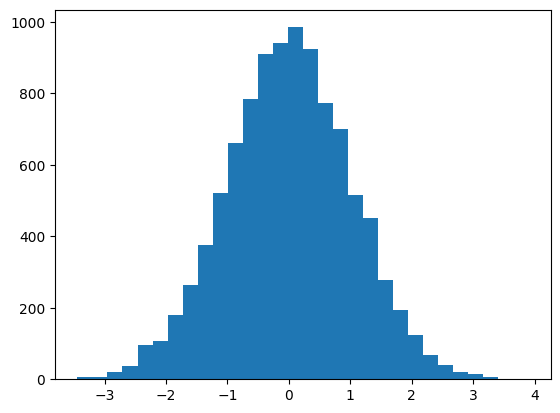

In [4]:
# generador aleatorio basado en la distribución normal
sample = normal(size=10000)
pyplot.hist(sample, bins=30) 
pyplot.show()

Estimación paramétrica

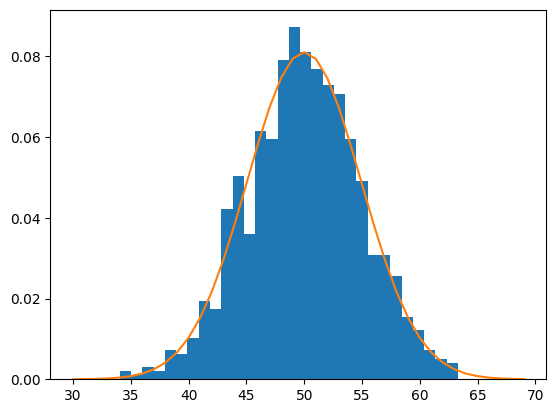

In [10]:
# mu = 50, sigma = 5 dat = 1000
sample = normal(loc=50, scale=5, size=1000)
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
pyplot.hist(sample, bins=30, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

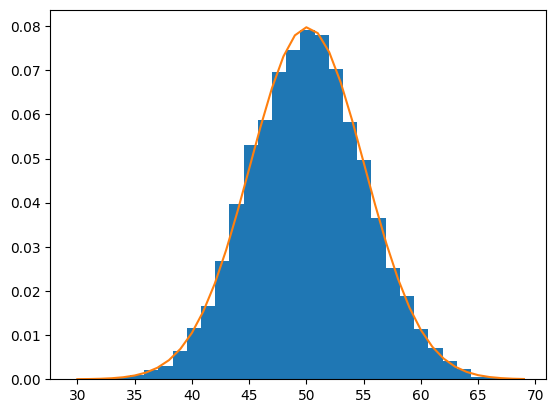

In [11]:
# mu = 50, sigma = 5 dat = 10000
sample = normal(loc=50, scale=5, size=10000)
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
pyplot.hist(sample, bins=30, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

Estimación no paramétrica
Kernel Density estimation

[parámetro de suavizado]: smoothing parameter

[función base]: basis function

In [13]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

In [16]:
#construimos una distribución bimodal - Donde loc es la media y scale el desvíacion estandar
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

KernelDensity(bandwidth=2)

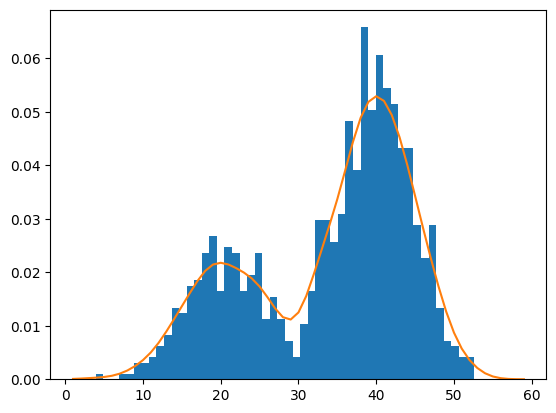

In [15]:
#construimos una distribución bimodal
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica
probabilities = np.exp(probabilities)  # inversión de probabilidad

pyplot.hist(sample, bins=50, density=True) 
pyplot.plot(values[:], probabilities)
pyplot.show()

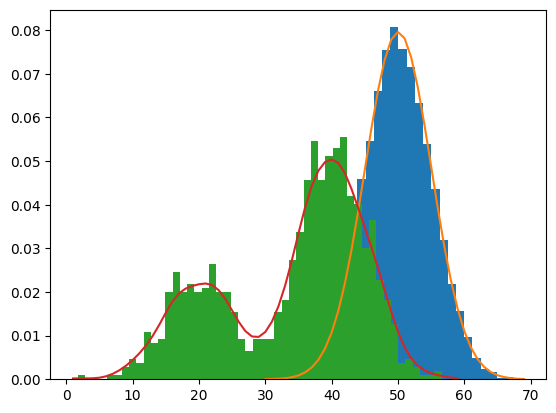

In [20]:
# sample = normal(size= 10000) #generador
# pyplot.hist(sample, bins = 30)
# pyplot.show()

if __name__ == '__main__':
    #Estimacion parametrica
    sample = normal(loc=50, scale=5, size=10000) # #mu = 50, sigma = 5
    mu = sample.mean()
    sigma = sample.std()
    dist = norm(mu,sigma)
    values = [value for value in range(30,70)]
    probabilidades = [dist.pdf(value) for value in values]
    pyplot.hist(sample, bins =30, density=True)
    pyplot.plot(values,probabilidades)
    #pyplot.show()

    #estimacion no parametrica
    #construimos una distribucion bimodal
    sample1 = normal(loc=20, scale=5, size=300)
    sample2 = normal(loc=40, scale=5, size=700)
    sample= hstack((sample1,sample2))

    #model = KernelDensity(bandwith=2,  kernel='gaussian')
    model = KernelDensity(bandwidth=2, kernel='gaussian')
    sample = sample.reshape(len(sample),1)
    model.fit(sample)

    values = np.asarray([value for value in range(1,60)])
    values = values.reshape(len(values), 1)
    probabilidades = model.score_samples(values) # probabilidad logaritmica
    probabilidades = np.exp(probabilidades) # inversion de probabilidad

    pyplot.hist(sample, bins=50, density=True)
    pyplot.plot(values, probabilidades)
    pyplot.show()